# **NATURAL LANGUAGE PROCESSING**

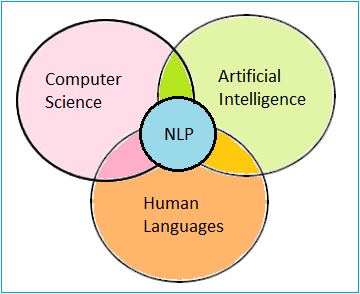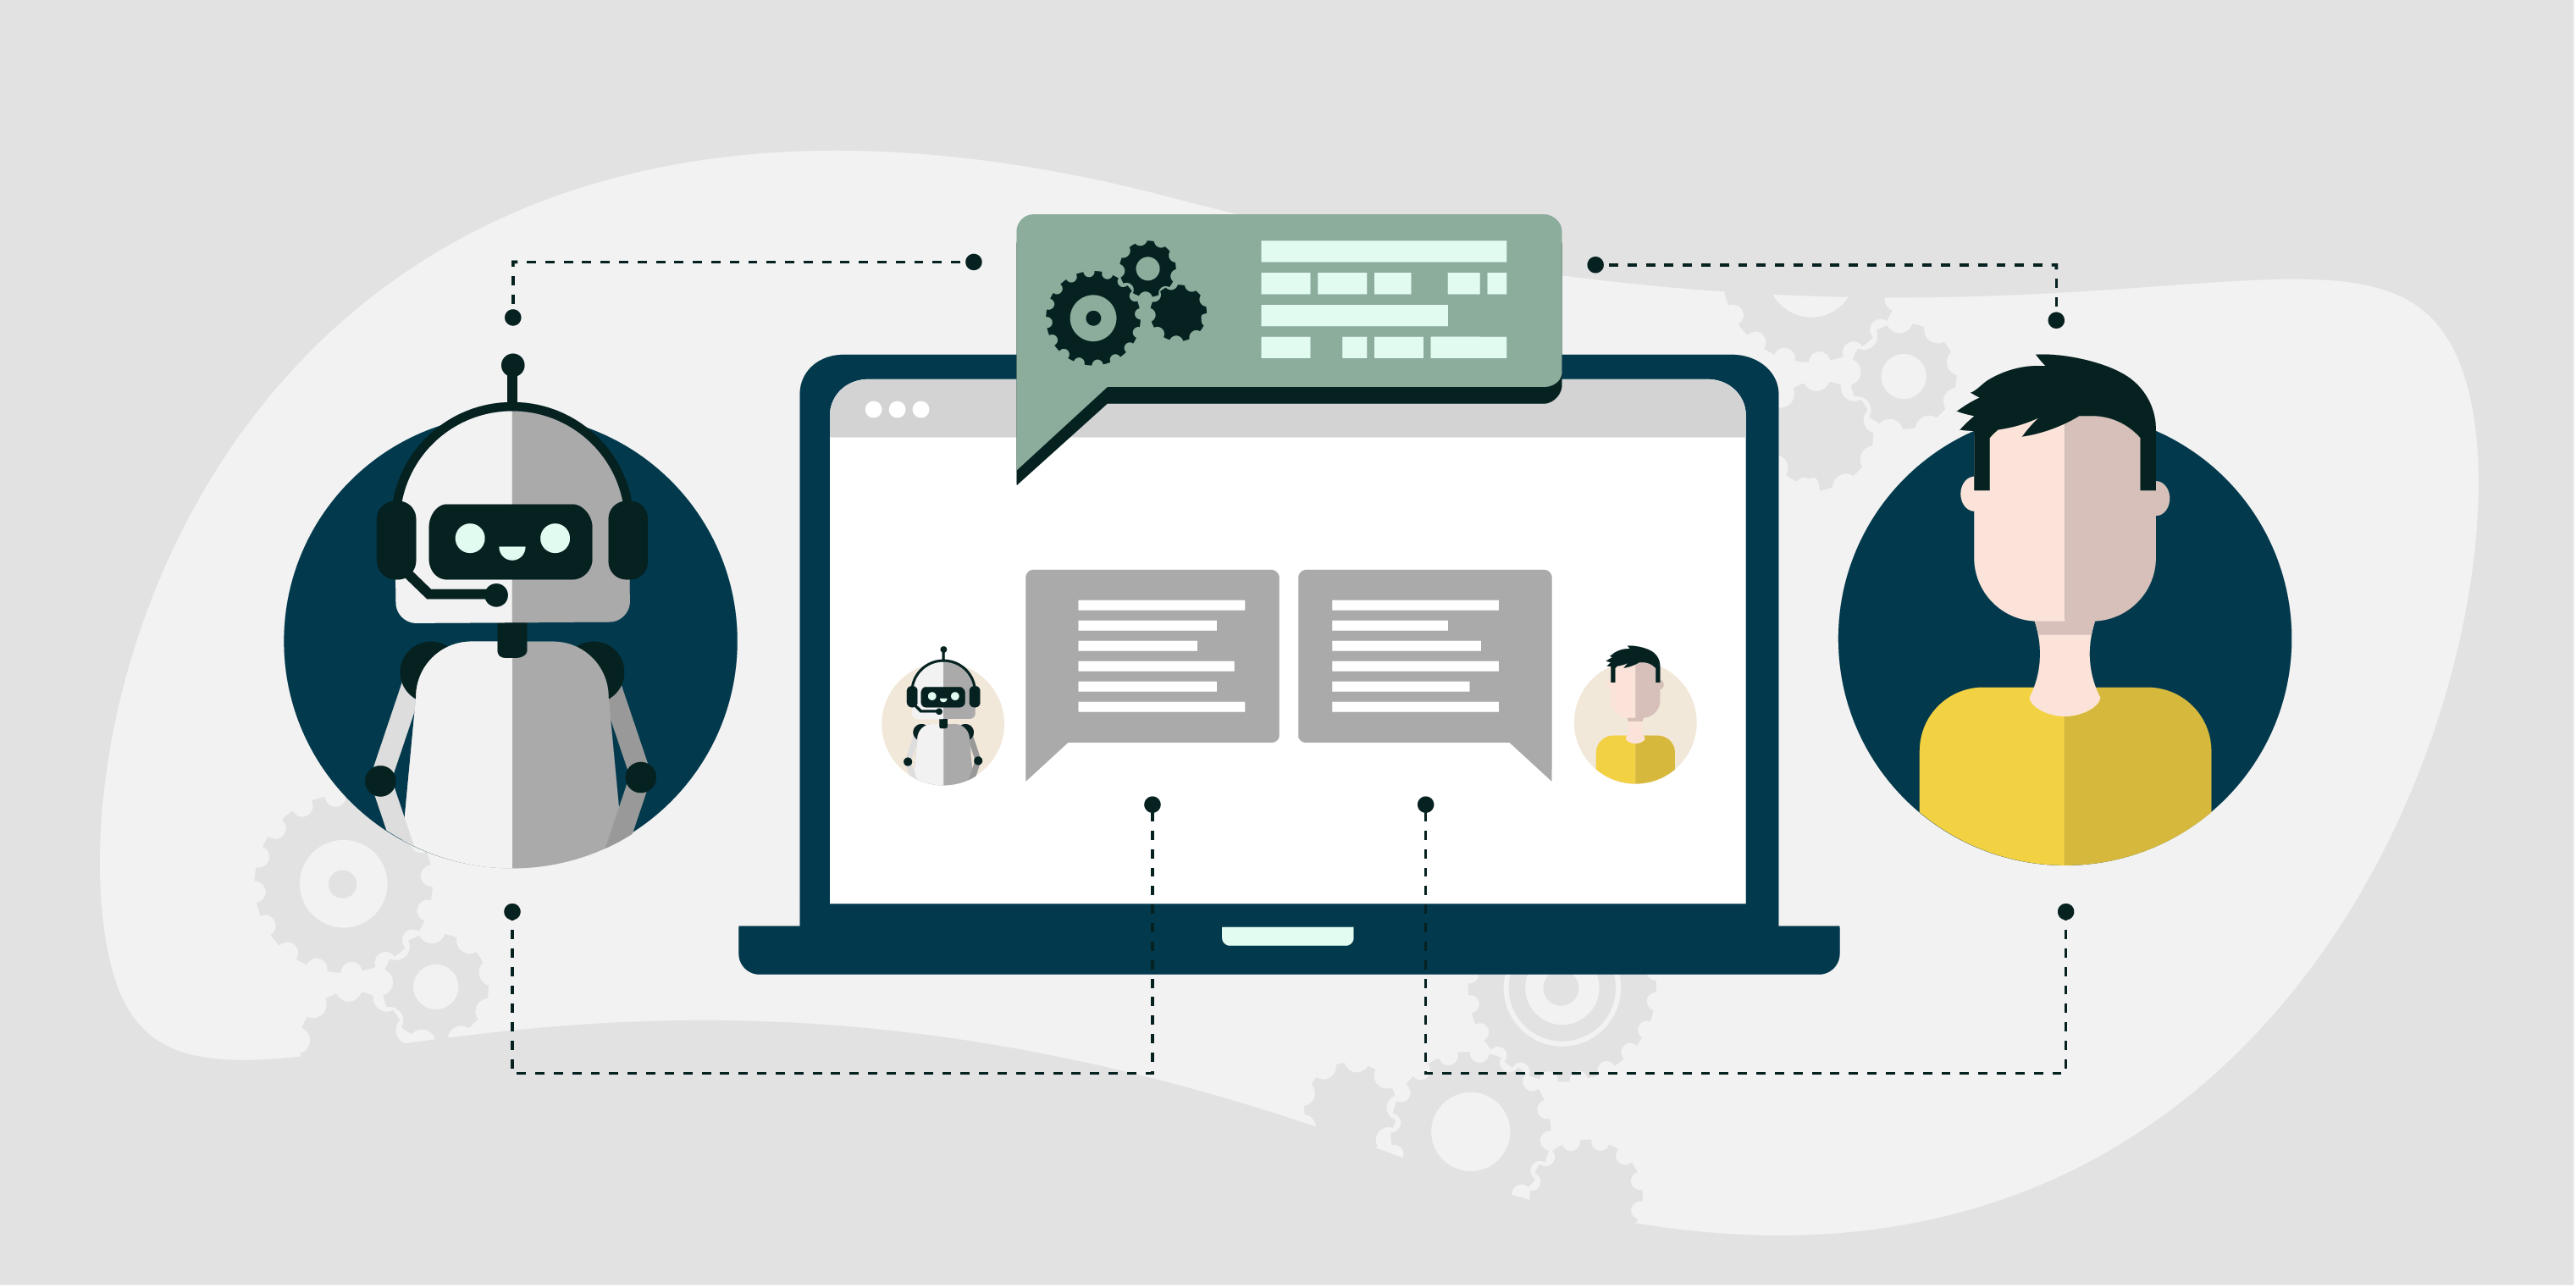

## ***IMPORTING LIBRARIES***

In [153]:
import numpy as np
import pandas as pd

## ***LOADING THE DATASET***

In [154]:
data = pd.read_csv("Tweets.csv")

## ***SUMMARIZING THE DATASET***

In [155]:
print(data.shape)
print(data.head())

(14640, 15)
             tweet_id  ...               user_timezone
0  570306133677760513  ...  Eastern Time (US & Canada)
1  570301130888122368  ...  Pacific Time (US & Canada)
2  570301083672813571  ...  Central Time (US & Canada)
3  570301031407624196  ...  Pacific Time (US & Canada)
4  570300817074462722  ...  Pacific Time (US & Canada)

[5 rows x 15 columns]


## ***SEGREGATING THE DATASET INTO INPUT AND OUTPUT***

In [156]:
input  = data.iloc[:,10].values
print(input)
output = data.iloc[:,1].values
print(output)

['@VirginAmerica What @dhepburn said.'
 "@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 ... '@AmericanAir Please bring American Airlines to #BlackBerry10'
 "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
 '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']
['neutral' 'positive' 'neutral' ... 'neutral' 'negative' 'neutral']


## ***DATA PRE-PROCESSING***

In [157]:
import regex as re

processed_inputs = []

for i in range(0,len(input)):

  # removing all the special characters

  processed_input = re.sub(r'\W',' ',str(input[i]))

  # removing all the single characters

  processed_input = re.sub(r'\s+[a-zA-Z]\s+',' ',processed_input)
  
  # substituting multiple spaces with single space

  processed_input = re.sub(r'\s+',' ',processed_input, flags=re.I)

  # removing prefixed 'b'

  processed_input = re.sub(r'^b\s+',' ',processed_input)

  # converting into lowercase

  processed_input = processed_input.lower()

  processed_inputs.append(processed_input)

In [158]:
processed_inputs

[' virginamerica what dhepburn said ',
 ' virginamerica plus you ve added commercials to the experience tacky ',
 ' virginamerica didn today must mean need to take another trip ',
 ' virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
 ' virginamerica and it a really big bad thing about it',
 ' virginamerica seriously would pay 30 flight for seats that didn have this playing it really the only bad thing about flying va',
 ' virginamerica yes nearly every time fly vx this ear worm won go away ',
 ' virginamerica really missed prime opportunity for men without hats parody there https co mwpg7grezp',
 ' virginamerica well didn but now do d',
 ' virginamerica it was amazing and arrived an hour early you re too good to me ',
 ' virginamerica did you know that suicide is the second leading cause of death among teens 10 24',
 ' virginamerica lt 3 pretty graphics so much better than minimal iconography d',
 ' virginamerica th

## ***FEATURE EXTRACTION***

In [159]:
!pip install nltk

In [160]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer

Vectorizer           = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words("english"))

Vectorized_inputs    = Vectorizer.fit_transform(processed_inputs).toarray()

In [162]:
Vectorized_inputs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## ***SPLITTING THE DATASET INTO TRAIN AND TEST DATA***

In [163]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Vectorized_inputs,output)

## ***TRAINING THE DATASET***

In [165]:
from sklearn.ensemble import RandomForestClassifier

Model = RandomForestClassifier(n_estimators=200)

Model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

## ***CALCULATING THE ACCURACY OF THE TRAINED MODEL***

In [166]:
y_pred = Model.predict(x_test)

In [167]:
y_pred

array(['negative', 'negative', 'positive', ..., 'negative', 'negative',
       'neutral'], dtype=object)

In [168]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("accuracy_score :",accuracy_score(y_test,y_pred)*100,"%")
print("confusion_matrix :")
print(confusion_matrix(y_test,y_pred))

accuracy_score : 74.8360655737705 %
confusion_matrix :
[[2092  126   64]
 [ 372  293   59]
 [ 218   82  354]]
